In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Calculate the date 1 year ago from the last data point in the database
last_date = dt.datetime.strptime(session.query(func.max(Measurement.date)).scalar(), '%Y-%m-%d') - dt.timedelta(days=365)  

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year = session.query(Measurement) \
        .filter(Measurement.date >last_date ) \
        .all()

In [12]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
data= []

for obj in last_year:
    row = {}
    row['date']= obj.date
    row['prcp']= obj.prcp
    data.append(row)

df = pd.DataFrame(data).set_index('date')


In [13]:
# Sort the dataframe by date
df= df.sort_values(by=['date'])

<BarContainer object of 365 artists>

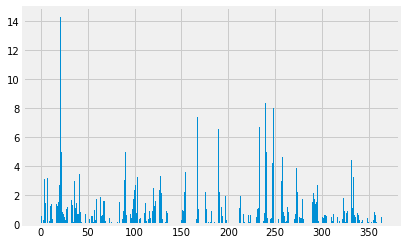

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

fff=df.groupby('date')['prcp'].sum()
x_axis = np.arange(len(fff))
plt.bar(x_axis,fff)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


part2

In [16]:
# Design a query to show how many stations are available in this dataset?
xx= engine.execute("SELECT * FROM Measurement")
p=[]
for x in xx:
    p.append(x)

df_measurement =pd.DataFrame(p)

df_measurement.columns=["id",'station','date','prcp','tobs']

len(df_measurement['station'].unique())


9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df_measurement.groupby('station')['id']\
                .count()\
                .reset_index(name='count') \
                .sort_values(['count'], ascending=False) 

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df_measurement.groupby('station')['tobs']\
                .agg(['min','max','mean','count'])\
                .sort_values(['count'], ascending=False)\
                .head(1)


,min,max,mean,count
station,,,,
USC00519281,54.0,85.0,71.663781,2772


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bfce810>]],
      dtype=object)

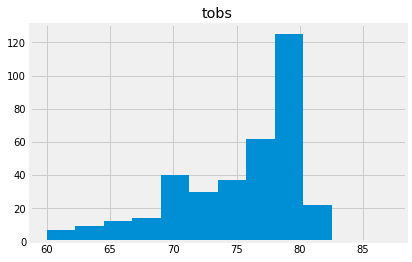

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_t_s = df_measurement.loc[df_measurement['tobs'].idxmax()]['station']
observation = df_measurement.loc[(df_measurement['station']==highest_t_s )&
                                 (pd.to_datetime(df_measurement['date'] ) >last_date) ]\
                            .sort_values(by=['date'])

observation.hist(column='tobs',bins=12)

In [20]:
observation

,id,station,date,prcp,tobs
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0
2368,2369,USC00519397,2016-08-28,0.01,78.0
...,...,...,...,...,...
2719,2720,USC00519397,2017-08-19,0.00,79.0
2720,2721,USC00519397,2017-08-20,0.00,81.0
2721,2722,USC00519397,2017-08-21,0.00,81.0
2722,2723,USC00519397,2017-08-22,0.00,82.0


In [21]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
print(calc_temps('2012-02-28'))

TypeError: calc_temps() missing 1 required positional argument: 'end_date'